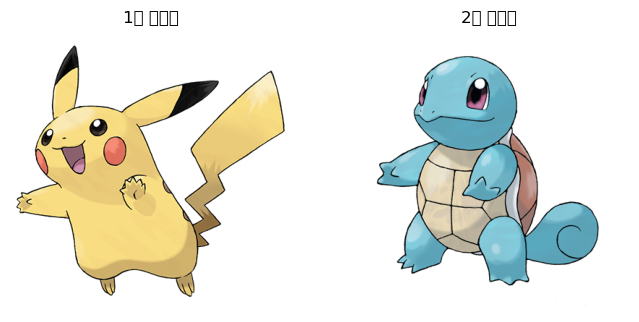

플레이어로 선택할 포켓몬 번호 입력 (1 또는 2):  1


=== 포켓몬 배틀 시작 ===


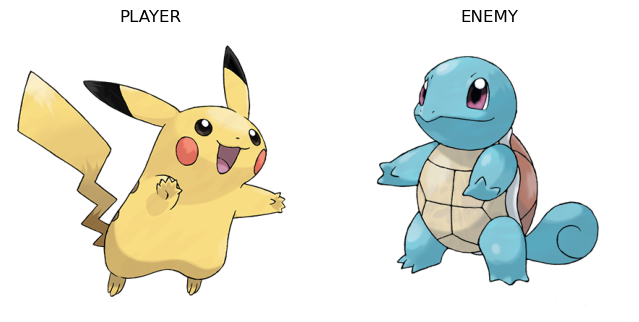


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 회복했다!


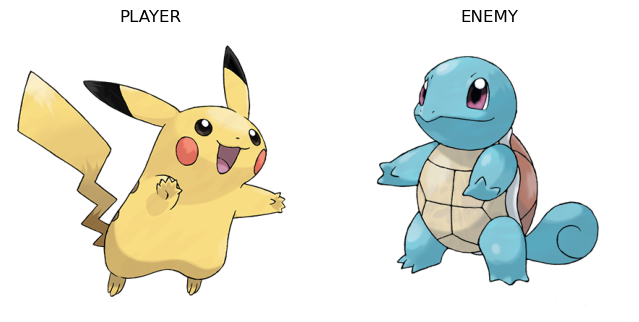


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적의 공격!


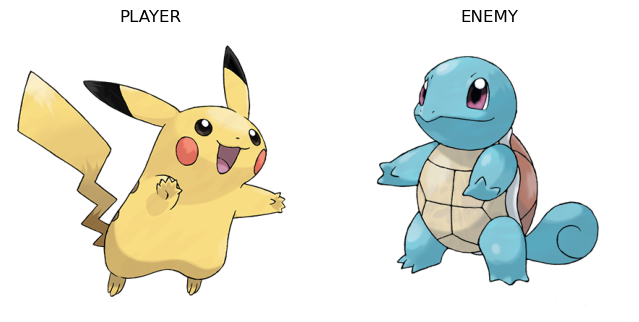


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 회복했다!


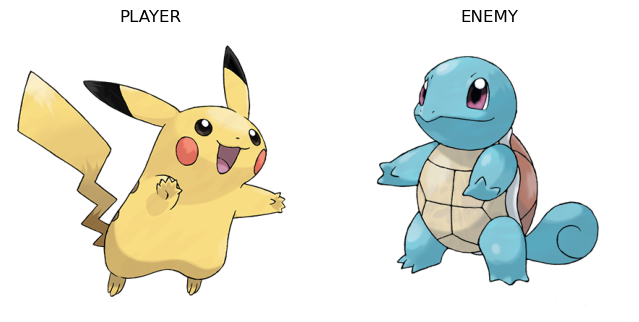


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 회복했다!


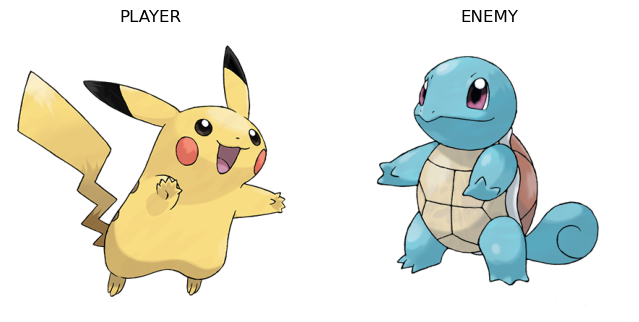


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 회복했다!


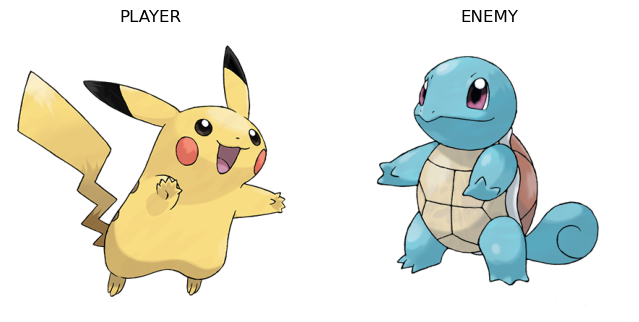


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!


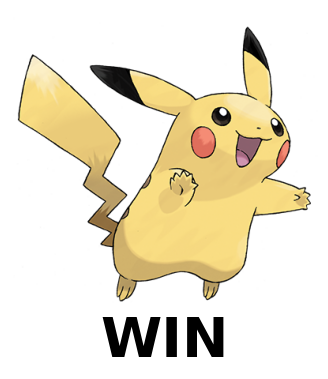

In [2]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# =========================
# 1. Pokemon 클래스 설계
# =========================
class Pokemon:
    def __init__(self, name, img_array, max_hp=10):
        self.name = name
        self.image = img_array
        self.max_hp = max_hp
        self.hp = max_hp
        self.charged = False  # 힘 모으기 상태
    
    def attack(self, target):
        if self.charged:
            damage = 6
            self.charged = False
        else:
            damage = 3
        target.hp -= damage
        if target.hp < 0:
            target.hp = 0
    
    def heal(self):
        self.hp += 2
        if self.hp > self.max_hp:
            self.hp = self.max_hp
    
    def charge(self):
        self.charged = True


# =========================
# 2. 이미지 불러오기 & 리사이즈
# =========================
def load_and_resize(path):
    img = Image.open(path).convert("RGBA")  # 알파 채널 포함 로드
    
    # 흰색 배경 캔버스 생성
    background = Image.new("RGBA", img.size, (255,255,255,255))
    
    # 알파 채널을 마스크로 합성
    background.paste(img, mask=img.split()[3])
    
    # 최종 RGB 변환
    background = background.convert("RGB")
    
    # 리사이즈
    background = background.resize((390,390))
    
    return np.array(background)

img1 = load_and_resize("pokemon1.png")
img2 = load_and_resize("pokemon2.png")

# 선택 화면 출력
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(img1)
ax[0].set_title("1번 포켓몬")
ax[0].axis("off")

ax[1].imshow(img2)
ax[1].set_title("2번 포켓몬")
ax[1].axis("off")

plt.show()

choice = input("플레이어로 선택할 포켓몬 번호 입력 (1 또는 2): ")

if choice == "1":
    player_img = np.fliplr(img1)  # 좌우 반전
    enemy_img = img2
    player_name = "Pokemon1"
    enemy_name = "Pokemon2"
else:
    player_img = np.fliplr(img2)
    enemy_img = img1
    player_name = "Pokemon2"
    enemy_name = "Pokemon1"

# 인스턴스 생성
player = Pokemon(player_name, player_img)
enemy = Pokemon(enemy_name, enemy_img)

# =========================
# 3. 화면 출력 함수
# =========================
def draw_battle(player, enemy):
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    
    ax[0].imshow(player.image)
    ax[0].set_xlabel(f"( {player.hp} / {player.max_hp} )", fontsize=14)
    ax[0].set_title("PLAYER")
    ax[0].axis("off")
    
    ax[1].imshow(enemy.image)
    ax[1].set_xlabel(f"( {enemy.hp} / {enemy.max_hp} )", fontsize=14)
    ax[1].set_title("ENEMY")
    ax[1].axis("off")
    
    plt.show()


# =========================
# 4. 게임 루프
# =========================
print("=== 포켓몬 배틀 시작 ===")

draw_battle(player, enemy)

while player.hp > 0 and enemy.hp > 0:
    
    # ---- 플레이어 턴 ----
    print("\n[플레이어 턴]")
    print("1. 공격  2. 회복  3. 힘 모으기")
    action = input("행동 선택: ")
    
    if action == "1":
        player.attack(enemy)
        print("플레이어의 공격!")
    elif action == "2":
        player.heal()
        print("플레이어의 회복!")
    elif action == "3":
        player.charge()
        print("플레이어는 힘을 모았다!")
    else:
        print("잘못 입력 → 기본 공격 실행")
        player.attack(enemy)
    
    # 적 체력 확인
    if enemy.hp <= 0:
        break
    
    # ---- 적 턴 ----
    print("\n[적 턴]")
    enemy_action = random.choice(["attack", "heal", "charge"])
    
    if enemy_action == "attack":
        enemy.attack(player)
        print("적의 공격!")
    elif enemy_action == "heal":
        enemy.heal()
        print("적이 회복했다!")
    else:
        enemy.charge()
        print("적이 힘을 모았다!")
    
    # 턴 종료 후 화면 출력
    draw_battle(player, enemy)

# =========================
# 5. 종료 결과 출력
# =========================
fig, ax = plt.subplots(figsize=(4,4))

if player.hp > 0:
    ax.imshow(player.image)
    result_text = "WIN"
else:
    ax.imshow(enemy.image)
    result_text = "LOSE"

ax.text(195, 420, result_text, fontsize=40, ha='center', va='center', fontweight='bold')
ax.axis("off")
plt.show()


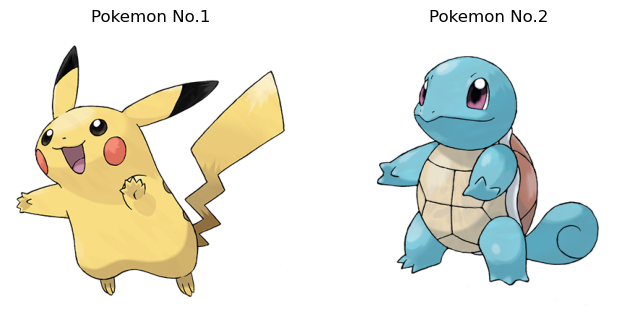

플레이어로 선택할 포켓몬 번호 입력 (1 또는 2):  1


=== 포켓몬 배틀 시작 ===


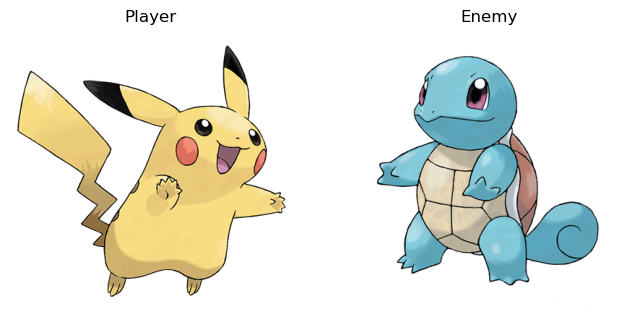


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적의 공격!


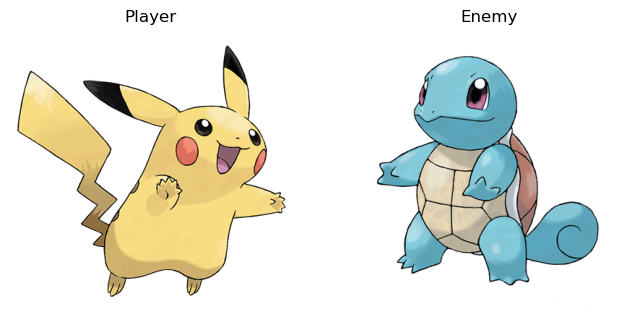


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 회복했다!


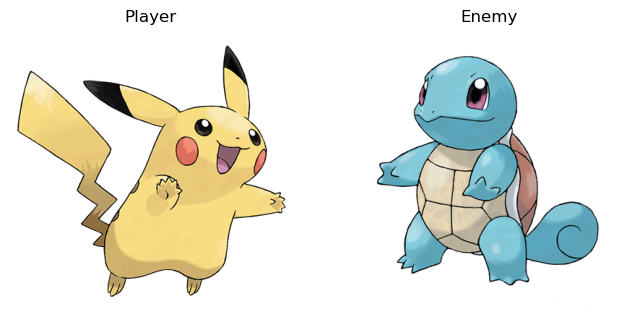


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 힘을 모았다!


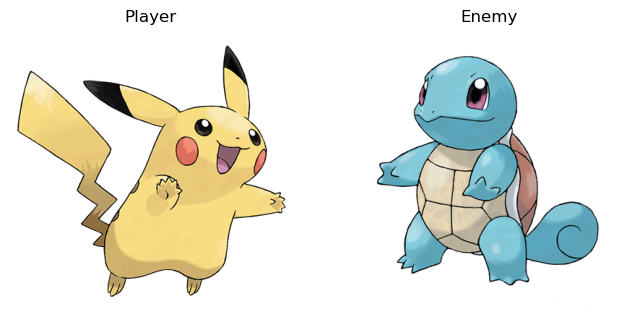


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!


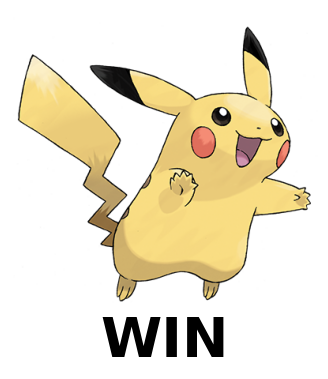

In [2]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# =========================
# 1. Pokemon 클래스 설계
# =========================
class Pokemon:
    def __init__(self, name, img_array, max_hp=10):
        self.name = name
        self.image = img_array
        self.max_hp = max_hp
        self.hp = max_hp
        self.charged = False  # 힘 모으기 상태
    
    def attack(self, target):
        if self.charged:
            damage = 6
            self.charged = False
        else:
            damage = 3
        target.hp -= damage
        if target.hp < 0:
            target.hp = 0
    
    def heal(self):
        self.hp += 2
        if self.hp > self.max_hp:
            self.hp = self.max_hp
    
    def charge(self):
        self.charged = True


# =========================
# 2. 이미지 불러오기 & 리사이즈
# =========================
def load_and_resize(path):
    img = Image.open(path).convert("RGBA")  # 알파 채널 포함 로드
    
    # 흰색 배경 캔버스 생성
    background = Image.new("RGBA", img.size, (255,255,255,255))
    
    # 알파 채널을 마스크로 합성
    background.paste(img, mask=img.split()[3])
    
    # 최종 RGB 변환
    background = background.convert("RGB")
    
    # 리사이즈
    background = background.resize((390,390))
    
    return np.array(background)

img1 = load_and_resize("pokemon1.png")
img2 = load_and_resize("pokemon2.png")

# 선택 화면 출력
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(img1)
ax[0].set_title("Pokemon No.1")
ax[0].axis("off")

ax[1].imshow(img2)
ax[1].set_title("Pokemon No.2")
ax[1].axis("off")

plt.show()

choice = input("플레이어로 선택할 포켓몬 번호 입력 (1 또는 2): ")

if choice == "1":
    player_img = np.fliplr(img1)  # 좌우 반전
    enemy_img = img2
    player_name = "Pokemon1"
    enemy_name = "Pokemon2"
else:
    player_img = np.fliplr(img2)
    enemy_img = img1
    player_name = "Pokemon2"
    enemy_name = "Pokemon1"

# 인스턴스 생성
player = Pokemon(player_name, player_img)
enemy = Pokemon(enemy_name, enemy_img)

# =========================
# 3. 화면 출력 함수
# =========================
def draw_battle(player, enemy):
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    
    # 플레이어
    ax[0].imshow(player.image)
    ax[0].set_title("Player")
    ax[0].set_xlabel(f"{player.hp}/{player.max_hp}", fontsize=15)
    ax[0].axis("off")
    
    # 적
    ax[1].imshow(enemy.image)
    ax[1].set_title("Enemy")
    ax[1].set_xlabel(f"{enemy.hp}/{enemy.max_hp}", fontsize=15)
    ax[1].axis("off")
    
    plt.show()


# =========================
# 4. 게임 루프
# =========================
print("=== 포켓몬 배틀 시작 ===")

draw_battle(player, enemy)

while player.hp > 0 and enemy.hp > 0:
    
    # ---- 플레이어 턴 ----
    print("\n[플레이어 턴]")
    print("1. 공격  2. 회복  3. 힘 모으기")
    action = input("행동 선택: ")
    
    if action == "1":
        player.attack(enemy)
        print("플레이어의 공격!")
    elif action == "2":
        player.heal()
        print("플레이어의 회복!")
    elif action == "3":
        player.charge()
        print("플레이어는 힘을 모았다!")
    else:
        print("잘못 입력 → 기본 공격 실행")
        player.attack(enemy)
    
    # 적 체력 확인
    if enemy.hp <= 0:
        break
    
    # ---- 적 턴 ----
    print("\n[적 턴]")
    enemy_action = random.choice(["attack", "heal", "charge"])
    
    if enemy_action == "attack":
        enemy.attack(player)
        print("적의 공격!")
    elif enemy_action == "heal":
        enemy.heal()
        print("적이 회복했다!")
    else:
        enemy.charge()
        print("적이 힘을 모았다!")
    
    # 턴 종료 후 화면 출력
    draw_battle(player, enemy)

# =========================
# 5. 종료 결과 출력
# =========================
fig, ax = plt.subplots(figsize=(4,4))

if player.hp > 0:
    ax.imshow(player.image)
    result_text = "WIN"
else:
    ax.imshow(enemy.image)
    result_text = "LOSE"

ax.text(195, 420, result_text, fontsize=40, ha='center', va='center', fontweight='bold')
ax.axis("off")
plt.show()


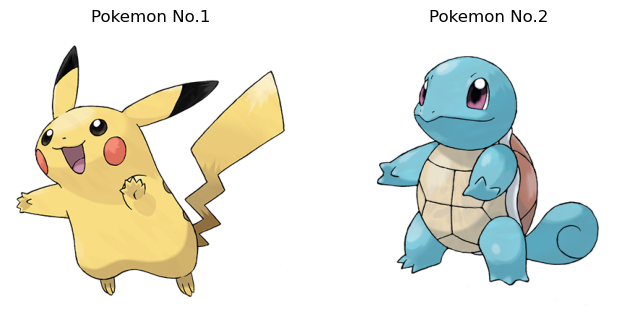

플레이어로 선택할 포켓몬 번호 입력 (1 또는 2):  1


=== 포켓몬 배틀 시작 ===


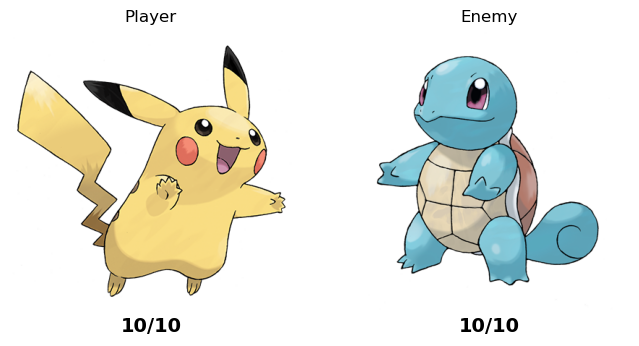


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 힘을 모았다!


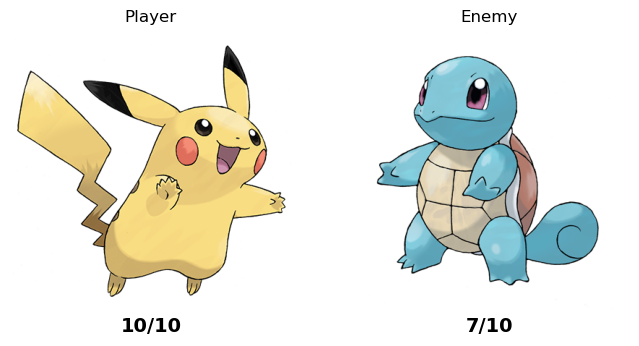


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 힘을 모았다!


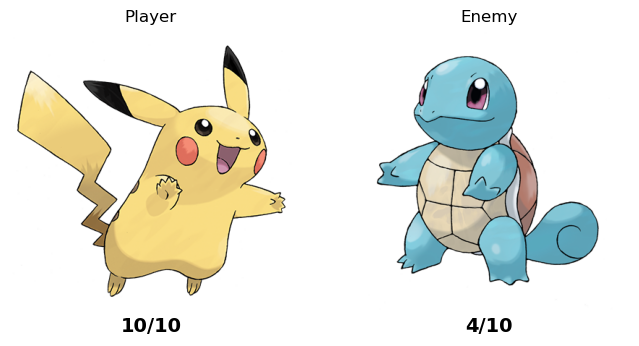


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적의 공격!


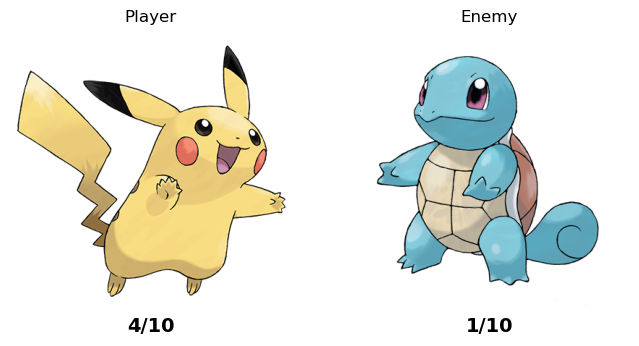


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적의 공격!


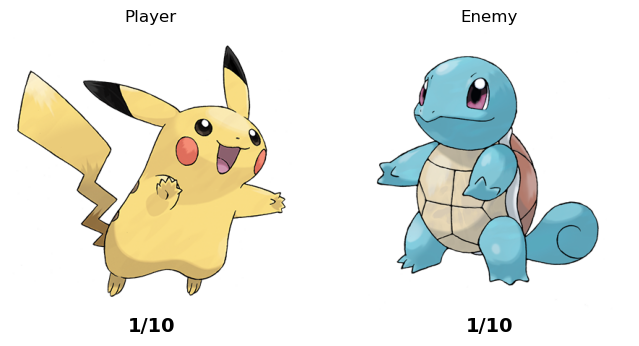


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 회복했다!


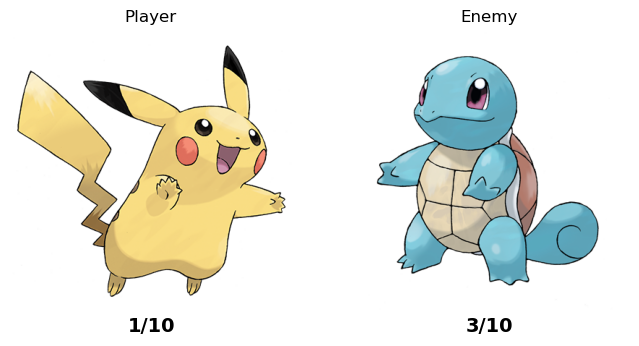


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적의 공격!


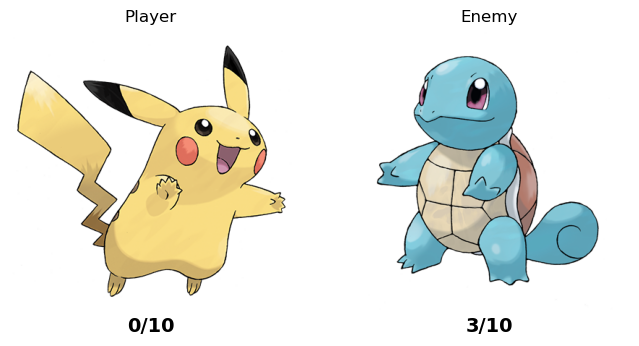

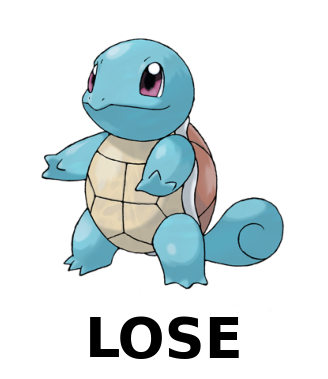

In [2]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# =========================
# 1. Pokemon 클래스 설계
# =========================
class Pokemon:
    def __init__(self, name, img_array, max_hp=10):
        self.name = name
        self.image = img_array
        self.max_hp = max_hp
        self.hp = max_hp
        self.charged = False  # 힘 모으기 상태
    
    def attack(self, target):
        if self.charged:
            damage = 6
            self.charged = False
        else:
            damage = 3
        target.hp -= damage
        if target.hp < 0:
            target.hp = 0
    
    def heal(self):
        self.hp += 2
        if self.hp > self.max_hp:
            self.hp = self.max_hp
    
    def charge(self):
        self.charged = True


# =========================
# 2. 이미지 불러오기 & 리사이즈
# =========================
def load_and_resize(path):
    img = Image.open(path).convert("RGBA")  # 알파 채널 포함 로드
    
    # 흰색 배경 캔버스 생성
    background = Image.new("RGBA", img.size, (255,255,255,255))
    
    # 알파 채널을 마스크로 합성
    background.paste(img, mask=img.split()[3])
    
    # 최종 RGB 변환
    background = background.convert("RGB")
    
    # 리사이즈
    background = background.resize((390,390))
    
    return np.array(background)

img1 = load_and_resize("pokemon1.png")
img2 = load_and_resize("pokemon2.png")

# 선택 화면 출력
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(img1)
ax[0].set_title("Pokemon No.1")
ax[0].axis("off")

ax[1].imshow(img2)
ax[1].set_title("Pokemon No.2")
ax[1].axis("off")

plt.show()

choice = input("플레이어로 선택할 포켓몬 번호 입력 (1 또는 2): ")

if choice == "1":
    player_img = np.fliplr(img1)  # 좌우 반전
    enemy_img = img2
    player_name = "Pokemon1"
    enemy_name = "Pokemon2"
else:
    player_img = np.fliplr(img2)
    enemy_img = img1
    player_name = "Pokemon2"
    enemy_name = "Pokemon1"

# 인스턴스 생성
player = Pokemon(player_name, player_img)
enemy = Pokemon(enemy_name, enemy_img)

# =========================
# 3. 화면 출력 함수
# =========================
def draw_battle(player, enemy):
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    
    # 플레이어
    ax[0].imshow(player.image)
    ax[0].set_title("Player")
    ax[0].text(195, 410, f"{player.hp}/{player.max_hp}",
               ha="center", va="center", fontsize=14, fontweight="bold")
    ax[0].axis("off")
    
    # 적
    ax[1].imshow(enemy.image)
    ax[1].set_title("Enemy")
    ax[1].text(195, 410, f"{enemy.hp}/{enemy.max_hp}",
               ha="center", va="center", fontsize=14, fontweight="bold")
    ax[1].axis("off")
    
    plt.show()

# =========================
# 4. 게임 루프
# =========================
print("=== 포켓몬 배틀 시작 ===")

draw_battle(player, enemy)

while player.hp > 0 and enemy.hp > 0:
    
    # ---- 플레이어 턴 ----
    print("\n[플레이어 턴]")
    print("1. 공격  2. 회복  3. 힘 모으기")
    action = input("행동 선택: ")
    
    if action == "1":
        player.attack(enemy)
        print("플레이어의 공격!")
    elif action == "2":
        player.heal()
        print("플레이어의 회복!")
    elif action == "3":
        player.charge()
        print("플레이어는 힘을 모았다!")
    else:
        print("잘못 입력 → 기본 공격 실행")
        player.attack(enemy)
    
    # 적 체력 확인
    if enemy.hp <= 0:
        break
    
    # ---- 적 턴 ----
    print("\n[적 턴]")
    enemy_action = random.choice(["attack", "heal", "charge"])
    
    if enemy_action == "attack":
        enemy.attack(player)
        print("적의 공격!")
    elif enemy_action == "heal":
        enemy.heal()
        print("적이 회복했다!")
    else:
        enemy.charge()
        print("적이 힘을 모았다!")
    
    # 턴 종료 후 화면 출력
    draw_battle(player, enemy)

# =========================
# 5. 종료 결과 출력
# =========================
fig, ax = plt.subplots(figsize=(4,4))

if player.hp > 0:
    ax.imshow(player.image)
    result_text = "WIN"
else:
    ax.imshow(enemy.image)
    result_text = "LOSE"

ax.text(195, 420, result_text, fontsize=40, ha='center', va='center', fontweight='bold')
ax.axis("off")
plt.show()


In [2]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# =========================
# 1. Pokemon 클래스 설계
# =========================
class Pokemon:
    def __init__(self, name, img_array, max_hp=10):
        self.name = name
        self.image = img_array
        self.max_hp = max_hp
        self.hp = max_hp
        self.charged = False  # 힘 모으기 상태
    
    def attack(self, target):
        if self.charged:
            damage = 6
            self.charged = False
        else:
            damage = 3
        target.hp -= damage
        if target.hp < 0:
            target.hp = 0
    
    def heal(self):
        self.hp += 2
        if self.hp > self.max_hp:
            self.hp = self.max_hp
    
    def charge(self):
        self.charged = True


# =========================
# 2. 이미지 불러오기 & 리사이즈
# =========================
def load_and_resize(path):
    img = Image.open(path).convert("RGBA")  # 알파 채널 포함 로드
    
    # 흰색 배경 캔버스 생성
    background = Image.new("RGBA", img.size, (255,255,255,255))
    
    # 알파 채널을 마스크로 합성
    background.paste(img, mask=img.split()[3])
    
    # 최종 RGB 변환
    background = background.convert("RGB")
    
    # 리사이즈
    background = background.resize((390,390))
    
    return np.array(background)

# =========================
# 초기 게임 세팅
# =========================
def setup_game():
    img1 = load_and_resize("pokemon1.png")
    img2 = load_and_resize("pokemon2.png")
    
    # 선택 화면
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    ax[0].imshow(img1); ax[0].set_title("Pokemon No.1"); ax[0].axis("off")
    ax[1].imshow(img2); ax[1].set_title("Pokemon No.2"); ax[1].axis("off")
    plt.show()
    
    choice = input("플레이어로 선택할 포켓몬 번호 입력 (1 또는 2): ")
    
    if choice == "1":
        player_img = np.fliplr(img1)
        enemy_img = img2
        player_name, enemy_name = "Pokemon1", "Pokemon2"
    else:
        player_img = np.fliplr(img2)
        enemy_img = img1
        player_name, enemy_name = "Pokemon2", "Pokemon1"
    
    player = Pokemon(player_name, player_img)
    enemy = Pokemon(enemy_name, enemy_img)
    
    return player, enemy

    
# =========================
# 3. 화면 출력 함수
# =========================
def draw_battle(player, enemy):
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    
    # 플레이어
    ax[0].imshow(player.image)
    ax[0].set_title("Player")
    ax[0].text(195, 410, f"{player.hp}/{player.max_hp}",
               ha="center", va="center", fontsize=14, fontweight="bold")
    ax[0].axis("off")
    
    # 적
    ax[1].imshow(enemy.image)
    ax[1].set_title("Enemy")
    ax[1].text(195, 410, f"{enemy.hp}/{enemy.max_hp}",
               ha="center", va="center", fontsize=14, fontweight="bold")
    ax[1].axis("off")
    
    plt.show()

# =========================
# 4. 게임 루프
# =========================
def battle_loop(player, enemy):
    print("=== 포켓몬 배틀 시작 ===")
    draw_battle(player, enemy)
    
    while player.hp > 0 and enemy.hp > 0:
        
        # ---- 플레이어 턴 ----
        print("\n[플레이어 턴]")
        print("1. 공격  2. 회복  3. 힘 모으기")
        action = input("행동 선택: ")
        
        if action == "1":
            player.attack(enemy)
            print("플레이어의 공격!")
        elif action == "2":
            player.heal()
            print("플레이어의 회복!")
        elif action == "3":
            player.charge()
            print("플레이어는 힘을 모았다!")
        else:
            print("잘못 입력 → 기본 공격")
            player.attack(enemy)
        
        if enemy.hp <= 0:
            break
        
        # ---- 적 턴 ----
        print("\n[적 턴]")
        enemy_action = random.choice(["attack","heal","charge"])
        
        if enemy_action == "attack":
            enemy.attack(player)
            print("적의 공격!")
        elif enemy_action == "heal":
            enemy.heal()
            print("적이 회복했다!")
        else:
            enemy.charge()
            print("적이 힘을 모았다!")
        
        draw_battle(player, enemy)

# =========================
# 5. 종료 결과 출력
# =========================
def show_result(player, enemy):
    fig, ax = plt.subplots(figsize=(4,4))
    
    if player.hp > 0:
        ax.imshow(player.image)
        result_text = "WIN"
    else:
        ax.imshow(enemy.image)
        result_text = "LOSE"
    
    ax.text(195, 430, result_text,
            ha="center", fontsize=40, fontweight="bold")
    ax.axis("off")
    plt.show()

# =========================
# 전체 게임 실행 함수
# =========================
def start_game():
    player, enemy = setup_game()
    battle_loop(player, enemy)
    show_result(player, enemy)


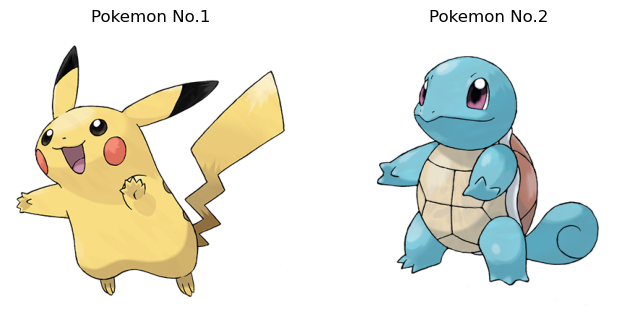

플레이어로 선택할 포켓몬 번호 입력 (1 또는 2):  1


=== 포켓몬 배틀 시작 ===


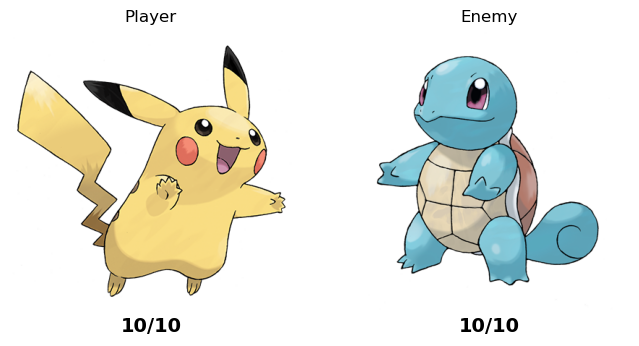


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적의 공격!


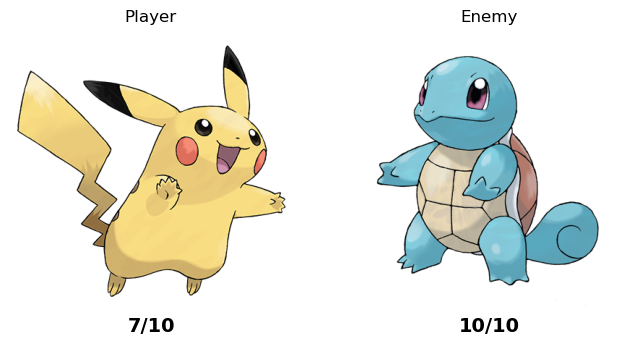


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 힘을 모았다!


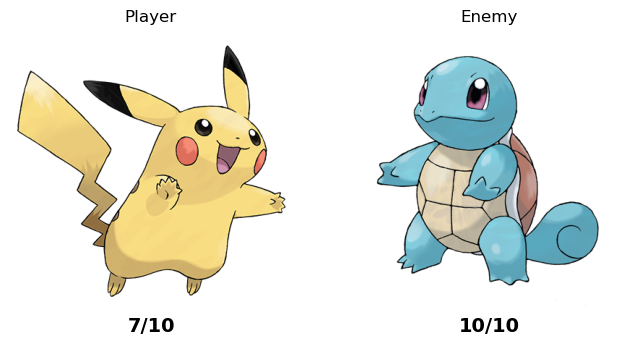


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 회복했다!


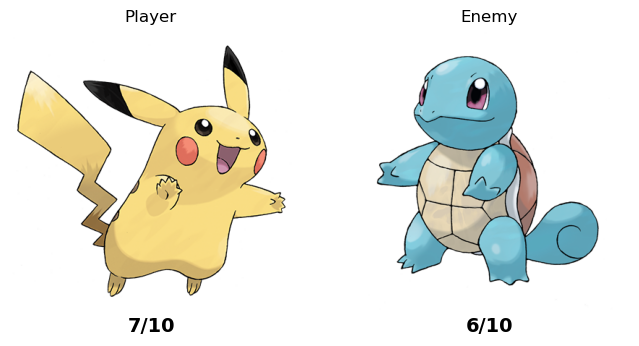


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 힘을 모았다!


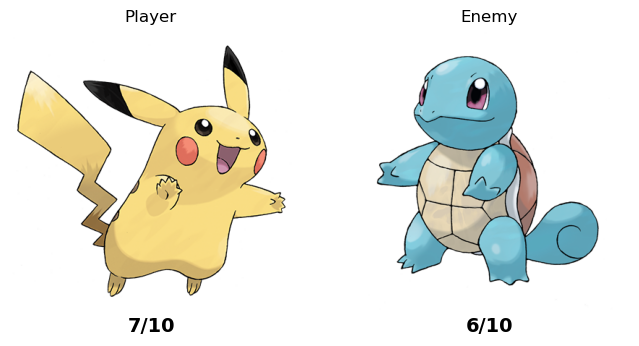


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!


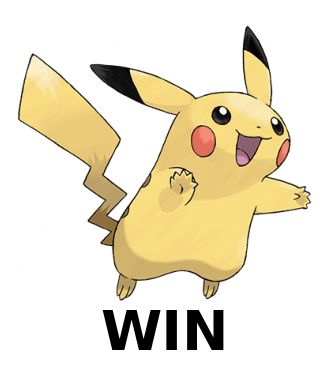

In [3]:
start_game()

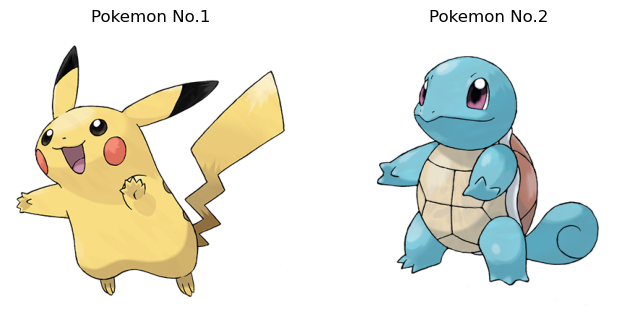

플레이어로 선택할 포켓몬 번호 입력 (1 또는 2):  2


=== 포켓몬 배틀 시작 ===


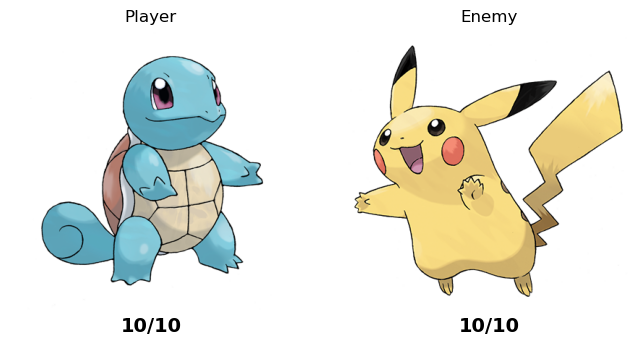


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 힘을 모았다!


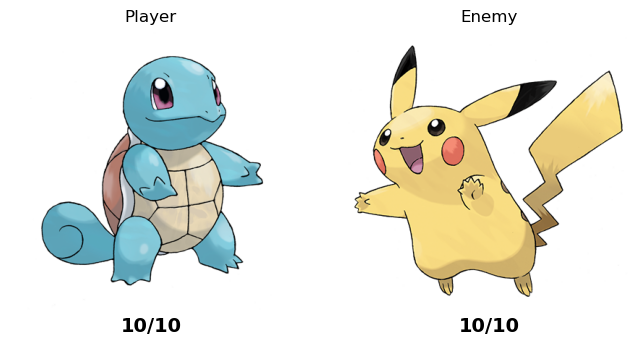


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!

[적 턴]
적이 힘을 모았다!


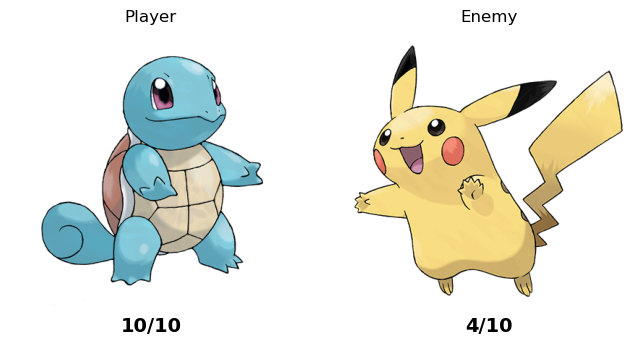


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 회복했다!


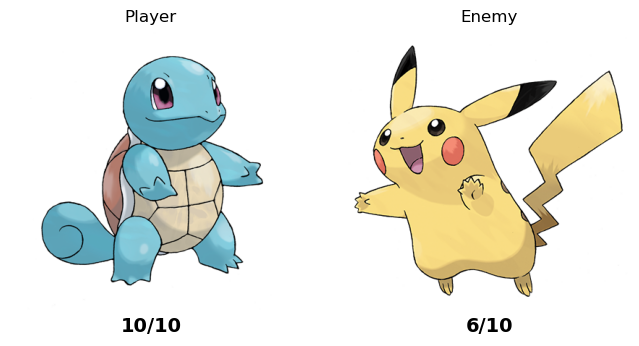


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  1


플레이어의 공격!


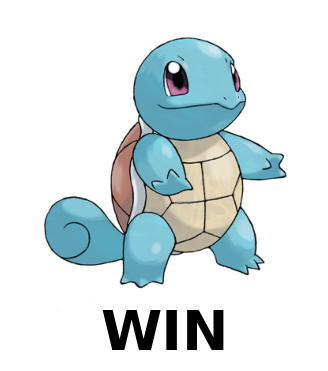

In [4]:
start_game()

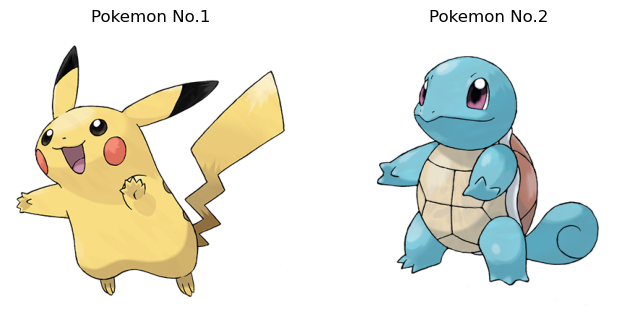

플레이어로 선택할 포켓몬 번호 입력 (1 또는 2):  2


=== 포켓몬 배틀 시작 ===


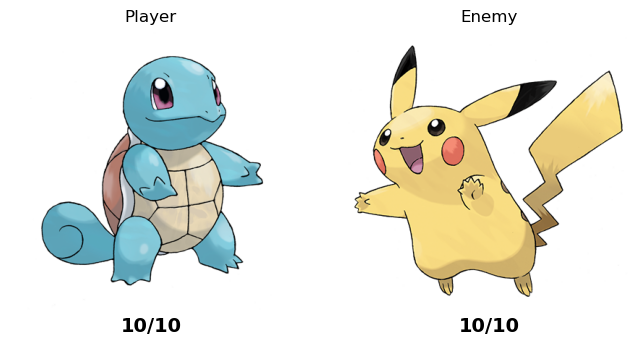


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적의 공격!


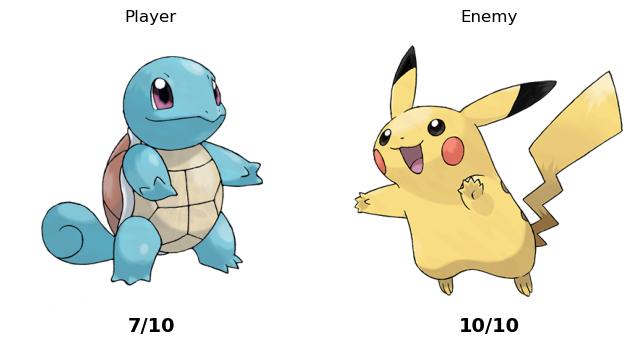


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적의 공격!


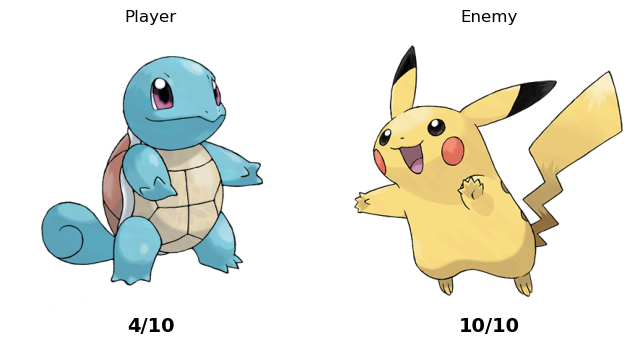


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 힘을 모았다!


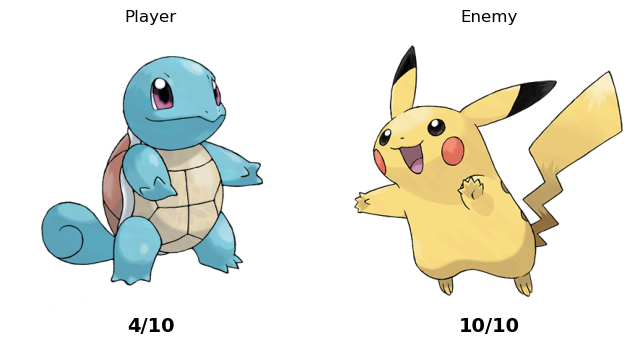


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 회복했다!


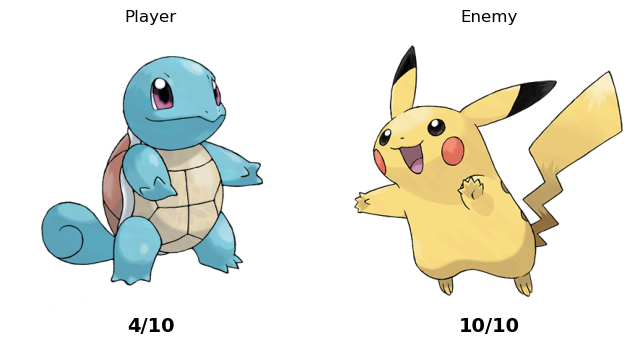


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적이 힘을 모았다!


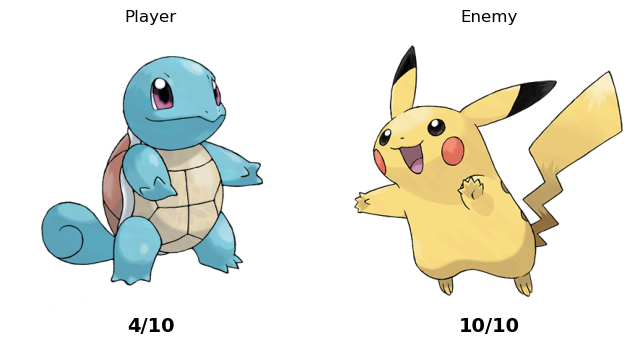


[플레이어 턴]
1. 공격  2. 회복  3. 힘 모으기


행동 선택:  3


플레이어는 힘을 모았다!

[적 턴]
적의 공격!


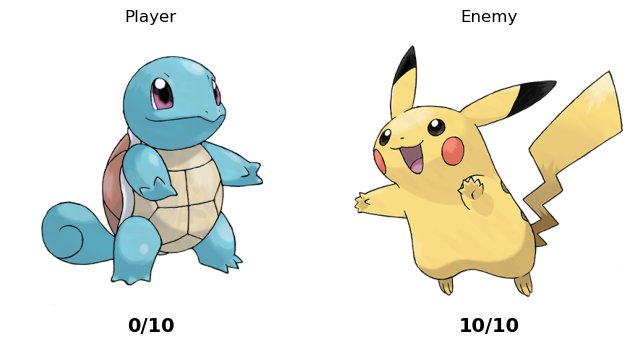

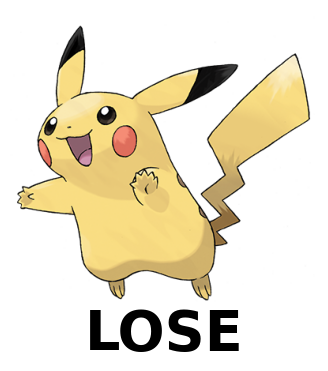

In [6]:
start_game()